In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


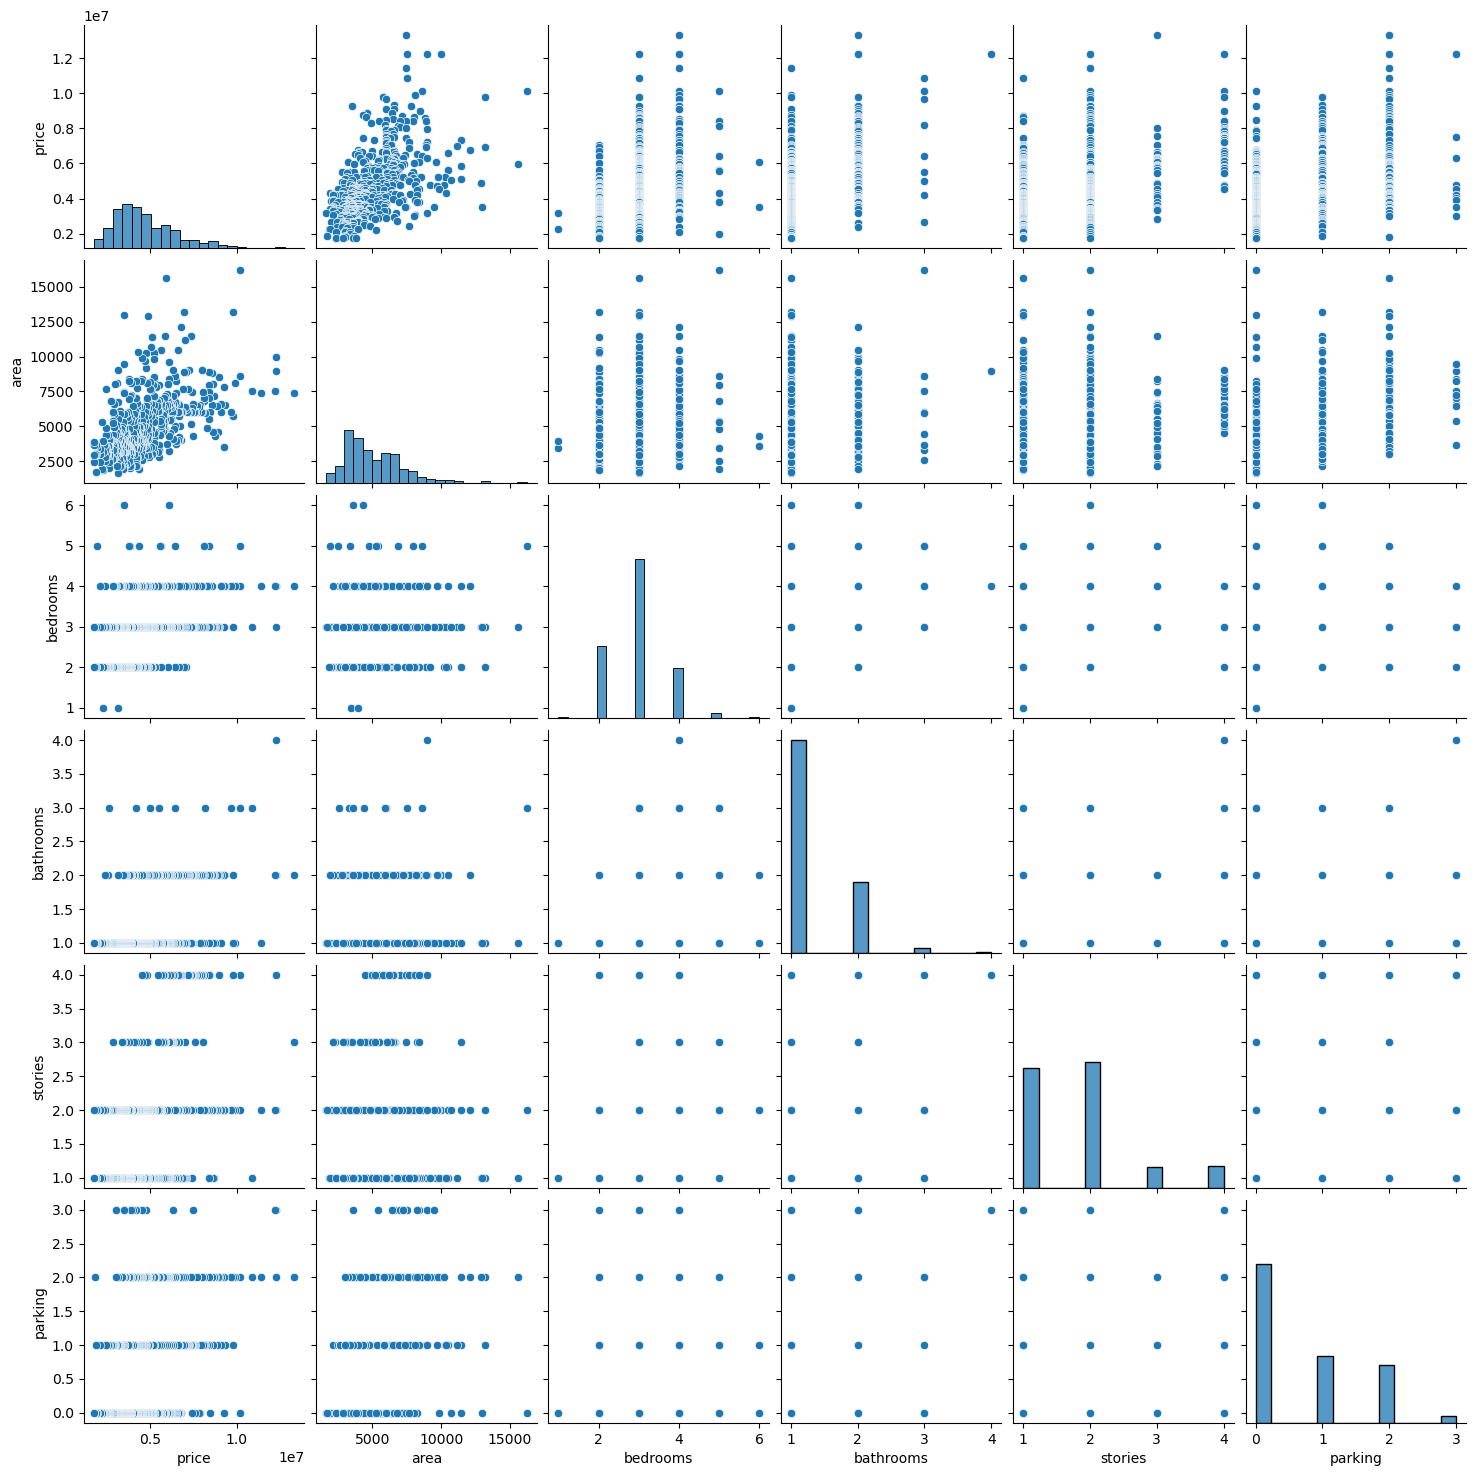

In [6]:
#visualising the numerical variables
sns.pairplot(df)
plt.show()

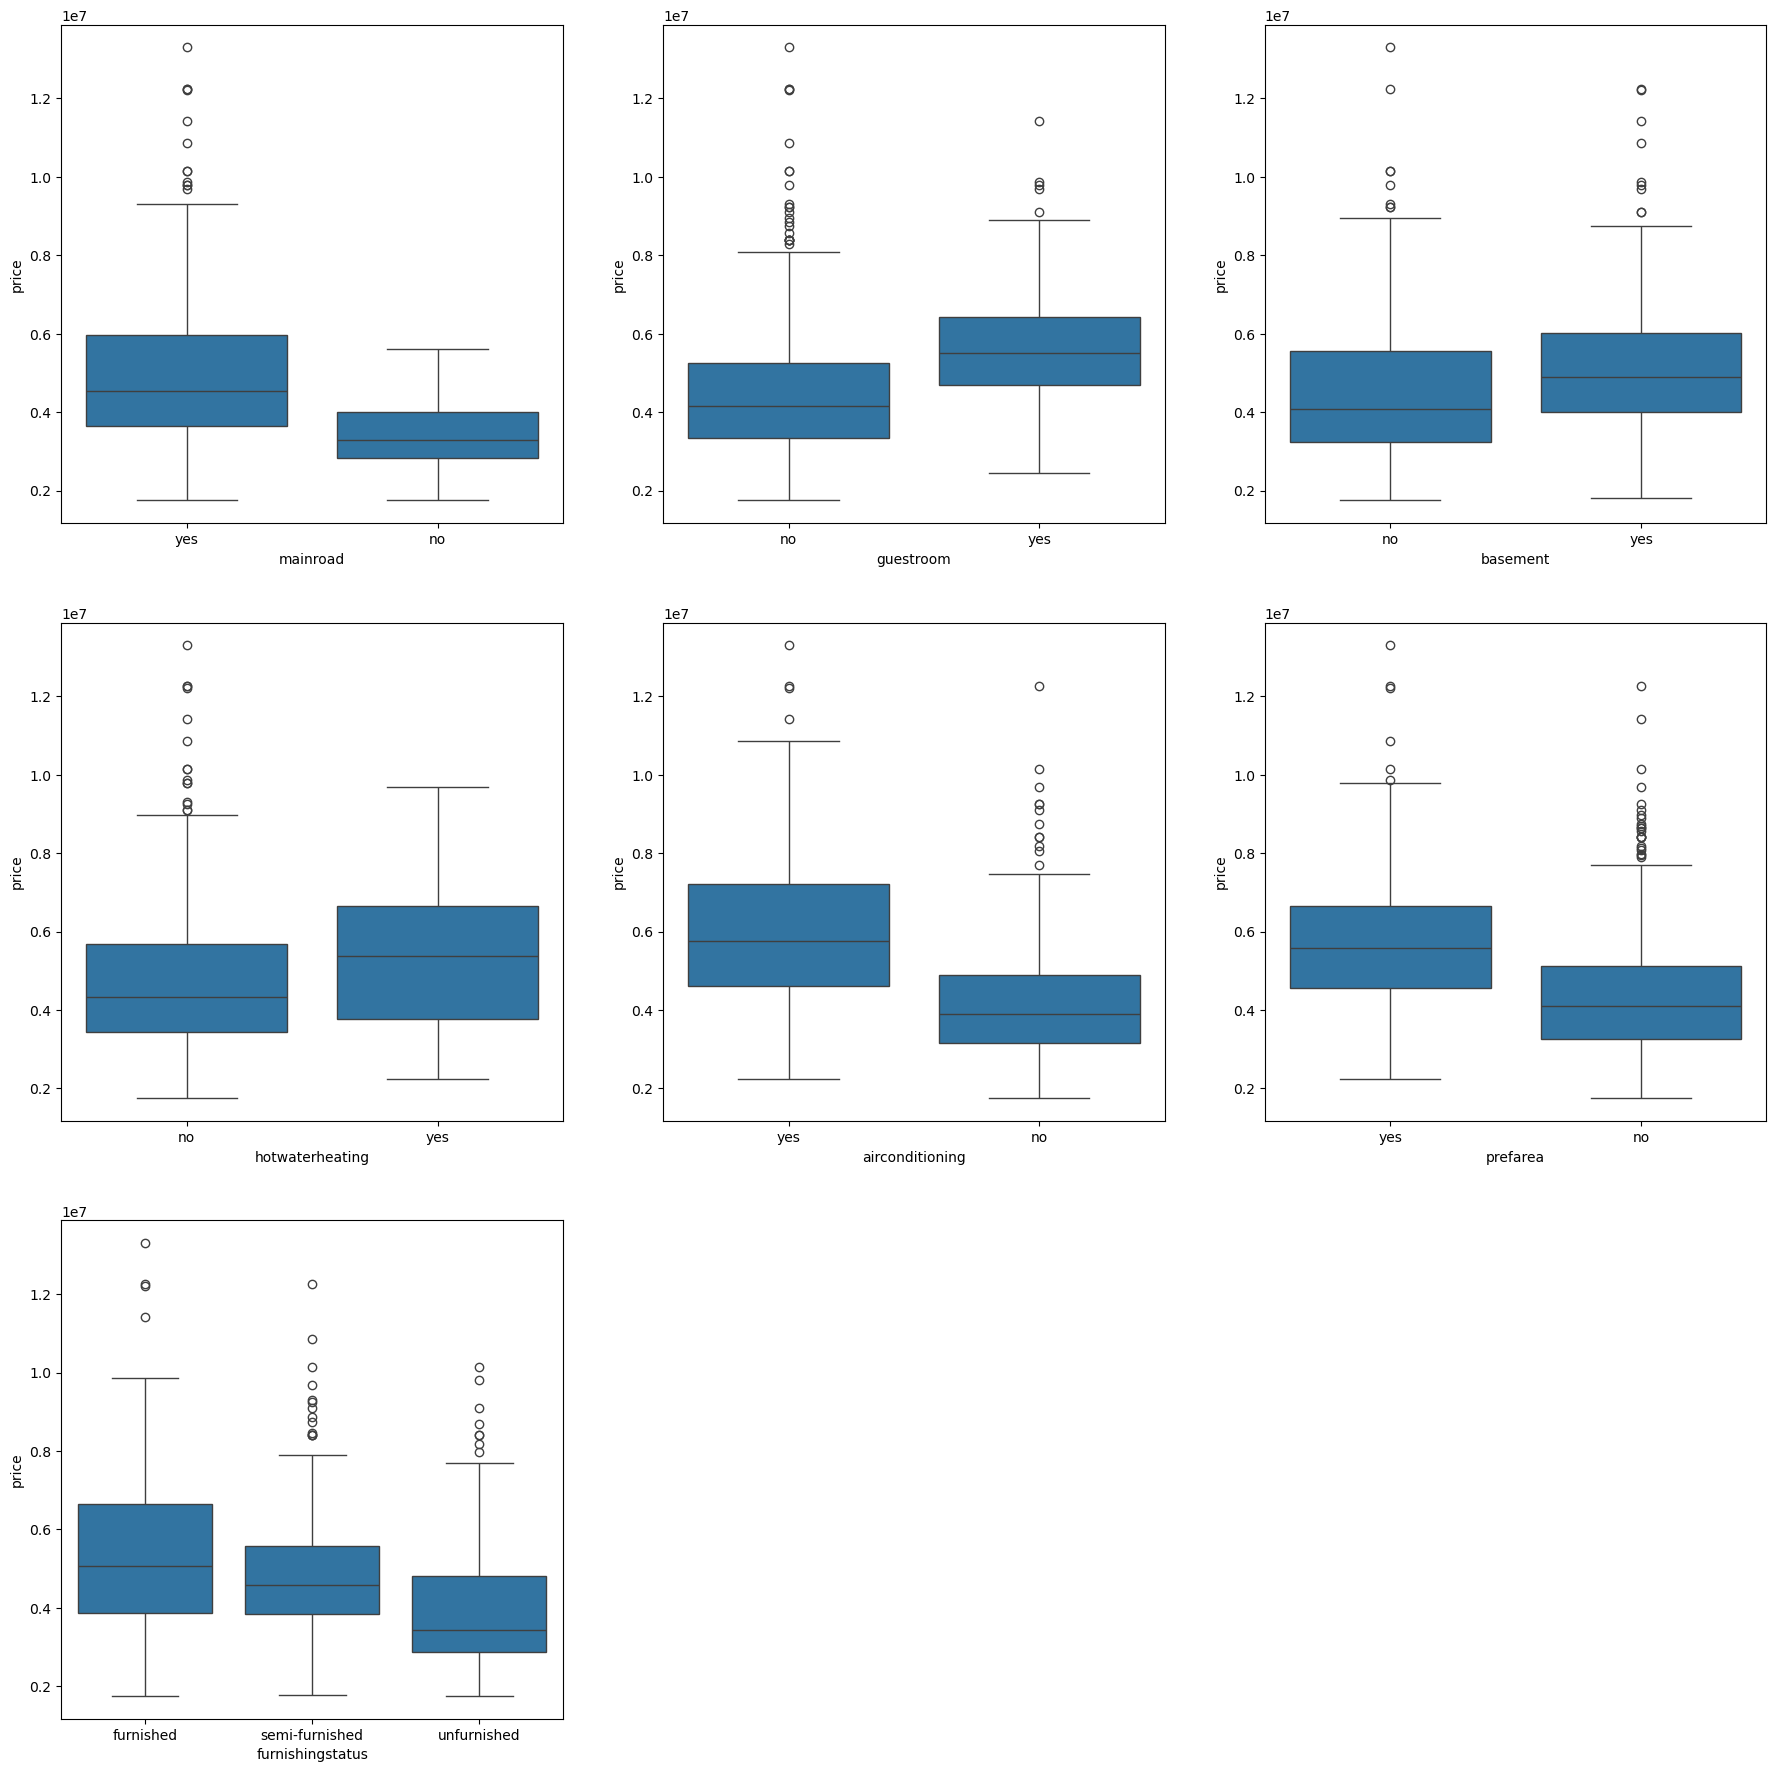

In [7]:
#Visualising Categorical variables
plt.figure(figsize=(22,22))
plt.subplot(3,3,1)
sns.boxplot(x="mainroad",y="price",data=df)

plt.subplot(3,3,2)
sns.boxplot(x="guestroom",y="price",data=df)

plt.subplot(3,3,3)
sns.boxplot(x="basement",y="price",data=df)

plt.subplot(3,3,4)
sns.boxplot(x="hotwaterheating",y="price",data=df)

plt.subplot(3,3,5)
sns.boxplot(x="airconditioning",y="price",data=df)

plt.subplot(3,3,6)
sns.boxplot(x="prefarea",y="price",data=df)

plt.subplot(3,3,7)
sns.boxplot(x="furnishingstatus",y="price",data=df)
plt.show()

In [8]:
varlist=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
df[varlist]=df[varlist].apply(lambda x:x.map({"yes":1,"no":0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [9]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [10]:
dummy=pd.get_dummies(df["furnishingstatus"],drop_first=True)
dummy

,semi-furnished,unfurnished
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
540,False,True
541,True,False
542,False,True
543,False,False


In [11]:
dumy=dummy.apply(lambda x:x.map({True:1,False:0}))
dumy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [12]:
df=pd.concat([df,dumy],axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [13]:
df=df.drop("furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [14]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


In [15]:
num_var=["area","bedrooms","bathrooms","stories","parking","price"]
df[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [16]:
sc=MinMaxScaler()
df_train[num_var]=sc.fit_transform(df_train[num_var])
df_train[num_var].head()

,area,bedrooms,bathrooms,stories,parking,price
359,0.155227,0.4,0.0,0.000000,0.333333,0.169697
19,0.403379,0.4,0.5,0.333333,0.333333,0.615152
159,0.115628,0.4,0.5,0.000000,0.000000,0.321212
35,0.454417,0.4,0.5,1.000000,0.666667,0.548133
28,0.538015,0.8,0.5,0.333333,0.666667,0.575758


In [17]:
df[num_var].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [18]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
y_train=df_train.pop("price")
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [20]:
X_train=df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


# Model building using sk-learn
### Use RFE

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe.fit(X_train,y_train)

,estimator,LinearRegression()
,n_features_to_select,10
,step,1
,verbose,0
,importance_getter,'auto'
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))#true:-selected col,false:-not selected col

[('area', np.True_, np.int64(1)),
 ('bedrooms', np.True_, np.int64(1)),
 ('bathrooms', np.True_, np.int64(1)),
 ('stories', np.True_, np.int64(1)),
 ('mainroad', np.True_, np.int64(1)),
 ('guestroom', np.True_, np.int64(1)),
 ('basement', np.False_, np.int64(3)),
 ('hotwaterheating', np.True_, np.int64(1)),
 ('airconditioning', np.True_, np.int64(1)),
 ('parking', np.True_, np.int64(1)),
 ('prefarea', np.True_, np.int64(1)),
 ('semi-furnished', np.False_, np.int64(4)),
 ('unfurnished', np.False_, np.int64(2))]

In [24]:
col=X_train.columns[rfe.support_]
col                                 #rfe says that these columns are useful

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [25]:
not_col=X_train.columns[~rfe.support_]
not_col                                 #rfe says that these columns are not useful

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [26]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [27]:
X_train_rfe=X_train[col]
X_train_rfe.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [28]:
X_train_rfe_sm=sm.add_constant(X_train_rfe)
X_train_rfe_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0


In [29]:
lr=sm.OLS(y_train,X_train_rfe_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           1.28e-82
Time:                        18:50:47   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X_train_new_rfe=X_train_rfe_sm.drop("bedrooms",axis=1)
X_train_new_rfe.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.5,0.333333,1,0,1,0,0.666667,0


In [31]:
lin=sm.OLS(y_train,X_train_new_rfe).fit()
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Wed, 28 Jan 2026   Prob (F-statistic):           6.67e-83
Time:                        18:50:47   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
#Compute VIF for the same
vif=pd.DataFrame()
vif["Features"]=X_train_new_rfe.columns
for i in range(X_train_new_rfe.shape[1]):
    vif.loc[i,"VIF"]=variance_inflation_factor(X_train_new_rfe.values,i)
    vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
0,const,8.181130
1,area,1.364573
7,airconditioning,1.230755
8,parking,1.218748
2,bathrooms,1.188366
3,stories,1.186425
4,mainroad,1.159545
9,prefarea,1.126295
5,guestroom,1.078581
6,hotwaterheating,1.068051


# Residual Analysis of train data

In [33]:
y_train_pred=lin.predict(X_train_new_rfe)
y_train_pred.head()

359    0.136896
19     0.471955
159    0.318751
35     0.514123
28     0.481968
dtype: float64

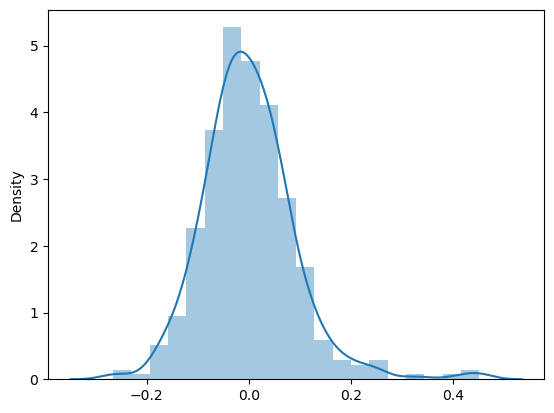

In [34]:
res=y_train-y_train_pred
sns.distplot(res,bins=20,kde=True)
plt.show()

#### Applying scaling on test set

In [35]:
num_var=["area","bedrooms","bathrooms","stories","parking","price"]
df_test[num_var]=sc.transform(df_test[num_var])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [36]:
y_test=df_test.pop("price")
y_test.head()

265    0.229697
54     0.484848
171    0.303030
244    0.242424
268    0.227879
Name: price, dtype: float64

In [37]:
X_test=df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [38]:
X_test_new = X_test[X_train_new_rfe.columns.drop("const")]
X_test_new.head()

,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


In [39]:
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
265,1.0,0.091869,0.0,0.333333,1,0,0,0,0.000000,1
54,1.0,0.366420,0.5,0.333333,1,1,0,1,0.333333,0
171,1.0,0.742080,0.0,0.000000,1,0,0,0,0.333333,1
244,1.0,0.306582,0.0,0.333333,1,1,0,0,0.000000,1
268,1.0,0.274023,0.0,0.333333,1,0,0,1,0.000000,0


In [40]:
y_test_pred=lin.predict(X_test_new)
y_test_pred.head()

265    0.201397
54     0.436928
171    0.341054
244    0.291195
268    0.250280
dtype: float64

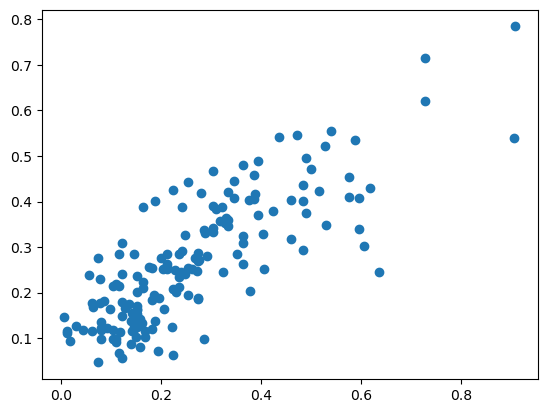

In [41]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [42]:
X_test.shape

(164, 13)

In [43]:
y_test.shape

(164,)

In [44]:
y_test_pred.shape

(164,)

In [46]:
X_test_new.shape

(164, 10)

In [47]:
y_test.shape

(164,)